### 타이타닉 생존자 예측을 위한 EDA

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
plt.rcParams["font.family"] = "Malgun Gothic" 
plt.rcParams["axes.unicode_minus"] = False 

In [ ]:
import seaborn as sns
df = sns.load_dataset("titanic") ## seaborn의 데이터셋 -> pandas의 dataFrame 형태로 주어짐
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.describe() # 숫자로 구성된 데이터만 기술통계로 보여줌

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()
# 11  deck   203 non-null   category # 누락된 데이터가 너무 많음! >> 제거하기
# Dtype : "object" 인 데이터를 "숫자형"으로 바꾸기 **중요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
#결측치 확인 -> 비율로 변경
missing_value = df.isnull().sum()
missing_percent = (missing_value/len(df))*100
missing_percent

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [ ]:
# 나이의 결측률이 20% 에 가까우니까 제거?
# 나이와 성별은 생존률에 중요한 요소니까 제거 X?
# 고민해야 될 사항

# embark_town, deck는 생존률에 중요한 요소가 X -> 제거해도 됨

In [ ]:
# age            19.865320 >> age(float64) 결측치를 어떻게 채워넣을 것인가? >> 1. 평균을 채워넣어보기
#embarked        0.224467 >> embarked(object) 결측치를 어떻게 채워넣을 것인가? >> 1. 평균을 채워넣어보기 >> 문자열의 평균은 어떻게 채워넣냐? >> 최빈 문자열로 채워넣기

In [ ]:
# age(float64) 결측치에 평균값을 채워넣기
df['age'].fillna(df['age'].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_9832\1503503937.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [ ]:
# age(float64) 결측치에 값이 잘 들어갔는지 확인
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [21]:
df['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [ ]:
df['embarked'].mode() # mode() : Series에서 가장 빈번하게 나타나는 값을 반환

0    S
Name: embarked, dtype: object

In [23]:
df['embarked'].mode()[0]

'S'

In [26]:
# embarked(object) 결측치에 최빈 문자열을 채워넣기
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [27]:
# mbarked(object) 결측치에 값이 잘 들어갔는지 확인
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### 생존자 현황

In [33]:
survived_count = df['survived'].value_counts() # 생존자 수
survived_rate = df['survived'].mean() # 생존자 비율
print(f"생존자 : {survived_count[1]}명")
print(f"사망자 : {survived_count[0]}명")
print(f"생존률 : {survived_rate:.2%}")

생존자 : 342명
사망자 : 549명
생존률 : 38.38%


survived    0    1
sex               
female     81  233
male      468  109


<Axes: xlabel='sex'>

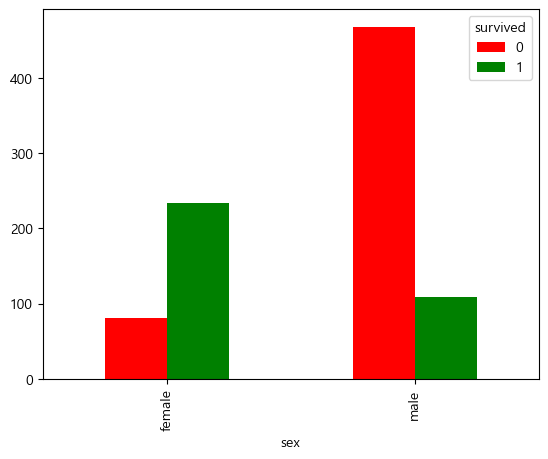

In [ ]:
# 성별(이진분류 되어 있음)에 따른 생존자 현황
gender_survival_counts = pd.crosstab(df['sex'], df['survived']) # pandas.crosstab(Series 형식의 데이터(행),Series 형식의 데이터(열)) : 두 Column의 교차 빈도를 구할 때 자주 사용됨
print(gender_survival_counts)
gender_survival_counts.plot(kind='bar', color=['red','green'])